<a href="https://colab.research.google.com/github/hungviet0304/DS_Final_project/blob/master/Process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Section
===

In [0]:
import pandas as pd
import numpy as np
import os
import copy
import math
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [0]:
from sklearn.metrics import mean_squared_error


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier

# You can also import other things ...
# YOUR CODE HERE (OPTION)
import re
from sklearn import preprocessing

Load and split
===

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd "drive/My Drive/Colab Notebooks/DS/Project/Data"

/content/drive/My Drive/Colab Notebooks/DS/Project/Data


In [0]:
# load data
file_list = os.listdir()
data_tmp = []
for file in file_list:
    df = pd.read_csv(file)
    data_tmp.append(df)
final_df = pd.concat(data_tmp, axis = 0, ignore_index=True)

In [8]:
final_df.describe(include="all")

,title,runtime,des,date,genre,cast,director,vote,gross,rating
count,79500,79500,79500,79500.000000,79500,79051,36380,7.950000e+04,4568,79500.000000
unique,61326,561,58586,NaN,1013,59675,21287,NaN,1278,NaN
top,The Proposal,0,Add a Plot,NaN,Documentary,Add a Plot,Kevin Dunn,NaN,$0.01M,NaN
freq,14,6913,7524,NaN,5496,5160,97,NaN,355,NaN
mean,NaN,NaN,NaN,2014.053296,NaN,NaN,NaN,4.756095e+03,NaN,4.126605
std,NaN,NaN,NaN,23.798955,NaN,NaN,NaN,3.698933e+04,NaN,3.430359
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
25%,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
50%,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,1.400000e+01,NaN,5.500000
75%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,1.930000e+02,NaN,7.200000


In [9]:
df = final_df.copy()
df = df[df.rating != 0]
df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,rating
0,Star Wars: Episode VIII - The Last Jedi,151,Rey develops her newly discovered abilitie...,2017,"Action, Adventure, Fantasy","Daisy Ridley, John Boyega, Mark Hamill, Carrie...",Rian Johnson,499477,$620.18M,7.1
1,Vikings,44,Vikings transports us to the brutal and my...,2013,"Action, Adventure, Drama","Katheryn Winnick, Gustaf Skarsgård, Alexander ...",NaN,364162,NaN,8.6
2,Game of Thrones,57,Nine noble families fight for control over...,2019,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",NaN,1617109,NaN,9.3
3,Star Wars: Episode VII - The Force Awakens,138,"Three decades after the Empire's defeat, a...",2015,"Action, Adventure, Sci-Fi","Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",J.J. Abrams,809628,$936.66M,7.9
4,Rogue One: A Star Wars Story,133,The daughter of an Imperial scientist join...,2016,"Action, Adventure, Sci-Fi","Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",Gareth Edwards,503361,$532.18M,7.8


In [0]:
# Tách X và y
y_sr = df["rating"] # sr là viết tắt của series
X_df = df.drop("rating", axis=1)

In [0]:
# Tách tập train và tập validation theo tỉ lệ 70%:30%
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.3, 
                                                              stratify=y_sr, random_state=0)

In [12]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34436 entries, 16268 to 68875
Data columns (total 9 columns):
title       34436 non-null object
runtime     34436 non-null object
des         34436 non-null object
date        34436 non-null int64
genre       34436 non-null object
cast        34129 non-null object
director    25407 non-null object
vote        34436 non-null int64
gross       3202 non-null object
dtypes: int64(2), object(7)
memory usage: 2.6+ MB


In [13]:
val_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14759 entries, 51183 to 1438
Data columns (total 9 columns):
title       14759 non-null object
runtime     14759 non-null object
des         14759 non-null object
date        14759 non-null int64
genre       14759 non-null object
cast        14617 non-null object
director    10950 non-null object
vote        14759 non-null int64
gross       1366 non-null object
dtypes: int64(2), object(7)
memory usage: 1.1+ MB


In [14]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross
16268,Broken Souls,7,Darth Revan has long since slain Darth Mal...,2015,"Short, Adventure","Jessica Smith, Abram Allred, David LaTomme, As...",Jared Seaich,23,NaN
2360,Awesome Asian Bad Guys,52,An action/comedy about two offbeat filmmak...,2014,"Action, Comedy","Stephen Dypiangco, Patrick Epino, Tamlyn Tomit...","Directors:Stephen Dypiangco, Patrick Epino",52,NaN
2072,Juba the iraqi sniper the untold story,0,Add a Plot,2018,"Short, Action","Mark Krenik, Alessandra DeMartino, Kevin Calib...",Samir Ali,15,NaN
45013,Addicted to Fame,89,A documentary that goes behind the scenes ...,2012,"Documentary, Biography, Comedy","Anna Nicole Smith, David Giancola, John James,...",David Giancola,212,NaN
10086,Into the Badlands,42,A mighty warrior and a young boy search fo...,2019,"Action, Adventure, Drama","Daniel Wu, Orla Brady, Emily Beecham, Aramis K...",NaN,37773,NaN


In [0]:
genre_rating_df = train_X_df["genre"].to_frame().join(train_y_sr)

In [16]:
genre_rating_df.head()

,genre,rating
16268,"Short, Adventure",6.8
2360,"Action, Comedy",7.2
2072,"Short, Action",9.9
45013,"Documentary, Biography, Comedy",3.7
10086,"Action, Adventure, Drama",8.0


Investigating the influence of some features into ratings
===

Counter({'Comedy': 11900, 'Documentary': 9118, 'Drama': 9056, 'Action': 8800, 'Short': 6953, 'Adventure': 6674, 'Crime': 5169, 'Animation': 5068, 'Romance': 4177, 'Biography': 3726, 'Family': 1528, 'Thriller': 1464, 'Horror': 1393, 'History': 1266, 'Fantasy': 1265, 'Sci-Fi': 1019, 'Music': 971, 'Mystery': 883, 'Sport': 576, 'News': 228, 'Musical': 200, 'War': 200, 'Reality-TV': 192, 'Talk-Show': 87, 'Western': 77, 'Game-Show': 52})
len =  26


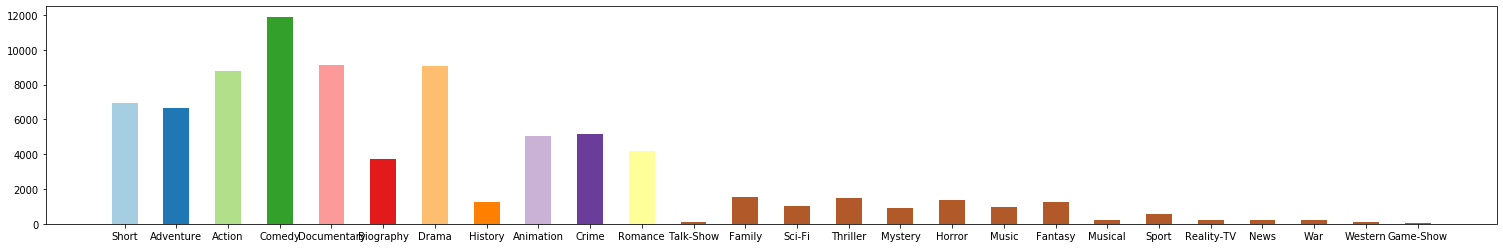

In [17]:
from collections import Counter

list_gens = list(genre_rating_df.genre)
unique_gen = []
for g in list_gens:
    unique_gen += g.strip().split(", ")
dict_gens = Counter(unique_gen)
print(dict_gens)
print("len = ",len(dict_gens))
plt.figure(figsize=(26,4))
plt.bar(dict_gens.keys(),dict_gens.values(), width = 0.5, color=plt.cm.Paired(np.arange(len(dict_gens))))
plt.show()

**The impact of genres on rating**

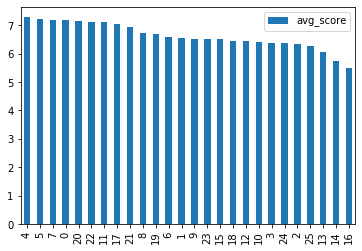

In [18]:
hist = {}
for i in range(genre_rating_df.shape[0]):
  genres = genre_rating_df.iloc[i].genre.strip().split(", ")
  rating  = genre_rating_df.iloc[i].rating
  for g in genres:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["genre","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df = hist_df.sort_values(by = ["avg_score"],ascending=False)
hist_df.plot.bar()


In [19]:
print(hist_df)

          genre  avg_score
4   Documentary   7.286598
5     Biography   7.206871
7       History   7.174961
0         Short   7.163944
20        Sport   7.160590
22         News   7.120614
11    Talk-Show   7.091954
17        Music   7.053965
21   Reality-TV   6.935938
8     Animation   6.727802
19      Musical   6.691500
6         Drama   6.571864
1     Adventure   6.546659
9         Crime   6.528594
23          War   6.521500
15      Mystery   6.512797
18      Fantasy   6.449091
12       Family   6.433377
10      Romance   6.405794
3        Comedy   6.380025
24      Western   6.357143
2        Action   6.327705
25    Game-Show   6.269231
13       Sci-Fi   6.050736
14     Thriller   5.726434
16       Horror   5.478894


Feature Engineering
===

Compute IF-IDF of specific columns

In [0]:
class tf_idf(BaseEstimator, TransformerMixin):
  def __init__(self, columns):
    self.columns = columns
  def fit(self, X_df, y=None):
    self.vectorizer = []
    for column in self.columns:
      tf = TfidfVectorizer()
      self.vectorizer.append(tf.fit(X_df[column]))
    return self
  def transform(self, X_df, y=None):
    new_X_df = X_df.copy()
    for i, column in enumerate(self.columns):
      transformed = self.vectorizer[i].transform(new_X_df[column])
      new_X_df[column] = [transformed[j].sum() for j in range(len(new_X_df))]
    return new_X_df

Preprocessing pipeline:
  - Compute IF-IDF of text features (genre, cast, director).
  - Filling missing values by median of its columns.
  - Standard Scaling in order to help SGD, ... converging more easily.

In [0]:
columns = ['genre','cast','director']
preprocess_pipeline= Pipeline(steps=[('compute_tfidf', tf_idf(columns)),
                                     ('imputing',SimpleImputer(missing_values = 0, strategy='median')),
                                     ("scaling",StandardScaler())])

In [0]:
#replace NaN element in cast to "other"
def fill_na(df):
  df = df.drop(columns=['title','des']) # not necessary for predicting
  df["director"] = df["director"].fillna("other_director");
  df["cast"] = df["cast"].fillna("other_cast");
  df["gross"] = df["gross"].fillna("0.0");
  #define money
  money = {"M": 10**6, "B": 10**12, "G": 10**9, "P": 10**15, "K": 10**3, "0": 0}
  for i in range(len(df)):
      
      df.gross.iloc[i] = float(re.findall("\d+\.\d+", df.gross.iloc[i])[0]) * money[df.gross.iloc[i][-1]]
  return df

In [0]:
# pipeline for RandomForest
full_pipeline = Pipeline(steps=[('preprocess',preprocess_pipeline),
                                ("regress", RandomForestRegressor(max_depth=10))])

In [0]:
#pipeline for linear regression
linear_regress_pipeline = Pipeline(steps=[('preprocess',preprocess_pipeline),
                                ("regress", LinearRegression())])

Predict
===

##**Experiment with Linear Regression Model**

In [25]:
%%time
filled_train_X_df = fill_na(train_X_df)
filled_val_X_df = fill_na(val_X_df)
linear_regress_pipeline.fit(filled_train_X_df, train_y_sr)
val_err = (1- linear_regress_pipeline.score(filled_val_X_df, val_y_sr))*100
train_err = (1 -  linear_regress_pipeline.score(filled_train_X_df, train_y_sr)) * 100

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
print("Error on train set: {}".format(train_err))
print("Error on val set: {}".format(val_err))

Error on train set: 94.27973415539606
Error on val set: 94.004392909143


In [0]:
# get predictions
linear_preds = linear_regress_pipeline.predict(filled_val_X_df)

Visualize True and Pred values

Text(0.5, 1.0, 'Result of the first 30 entries of val set')

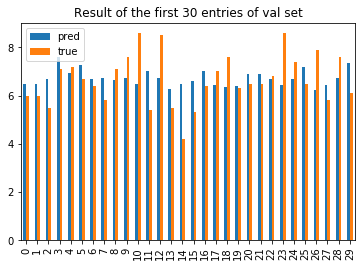

In [28]:
linear_pred_df = pd.DataFrame(columns =['pred','true'])
linear_pred_df['pred'] = linear_preds[:30]
linear_pred_df['true'] = list(val_y_sr[:30])
linear_pred_df.plot.bar()
plt.title("Result of the first 30 entries of val set")

##**Experiment RandomForest Model** (about 17mins to run)
  - Choose the best model by tuning the depth and number of tree in forest.
  - There are four choices of depth: 10, 20, 30, 40.
  - Number of trees: 40, 50, 60.
  - We decided these values because of the computational cost.

In [29]:
%%time
max_depth = [10,20,30,40]
n_estimators = [40, 50, 60]
best_depth = 0
val_errs = []
train_errs = []
best_val_err = float('inf')
best_estimator = 0
filled_train_X_df = fill_na(train_X_df)
filled_val_X_df = fill_na(val_X_df)
for estimator in n_estimators:
  print("estimator: {}".format(estimator))
  for depth in max_depth:
    print("depth: {}".format(depth))
    full_pipeline.set_params(regress__n_estimators=estimator, regress__max_depth=depth)
    full_pipeline.fit(filled_train_X_df,train_y_sr)
    cur_train_err = (1 -  full_pipeline.score(filled_train_X_df, train_y_sr)) * 100
    train_errs.append(cur_train_err)
    cur_val_err = (1- full_pipeline.score(filled_val_X_df, val_y_sr))*100
    val_errs.append(cur_val_err)
    if cur_val_err < best_val_err:
      best_val_err = cur_val_err
      best_estimator = estimator
      best_depth = depth


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


estimator: 40
depth: 10
depth: 20
depth: 30
depth: 40
estimator: 50
depth: 10
depth: 20
depth: 30
depth: 40
estimator: 60
depth: 10
depth: 20
depth: 30
depth: 40
CPU times: user 17min 24s, sys: 10.5 s, total: 17min 35s
Wall time: 17min 29s


In [30]:
print("best depth: {}".format(best_depth))
print("best estimator: {}".format(best_estimator))
print("Error on train set: {}".format(train_err))
print("Error on val set: {}".format(val_err))

best depth: 40
best estimator: 60
Error on train set: 94.27973415539606
Error on val set: 94.004392909143
CPU times: user 1.03 ms, sys: 996 µs, total: 2.03 ms
Wall time: 1.45 ms


In [0]:
# train again with best_depth and best_estimator
full_pipeline.set_params(regress__n_estimators=best_estimator, regress__max_depth=best_depth)
full_pipeline.fit(filled_train_X_df,train_y_sr)
forest_preds = full_pipeline.predict(filled_val_X_df)

Visualize True and Pred values

Text(0.5, 1.0, 'Result of the first 30 entries of val set')

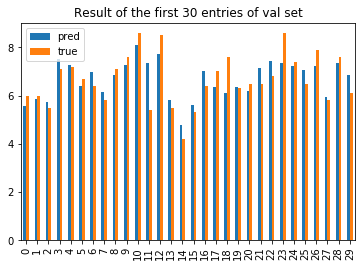

In [33]:
randomforest_df = pd.DataFrame(columns =['pred','true'])
randomforest_df['pred'] = forest_preds[:30]
randomforest_df['true'] = list(val_y_sr[:30])
randomforest_df.plot.bar()
plt.title("Result of the first 30 entries of val set")

Plot results of both linear regression and Randomforest in validation set

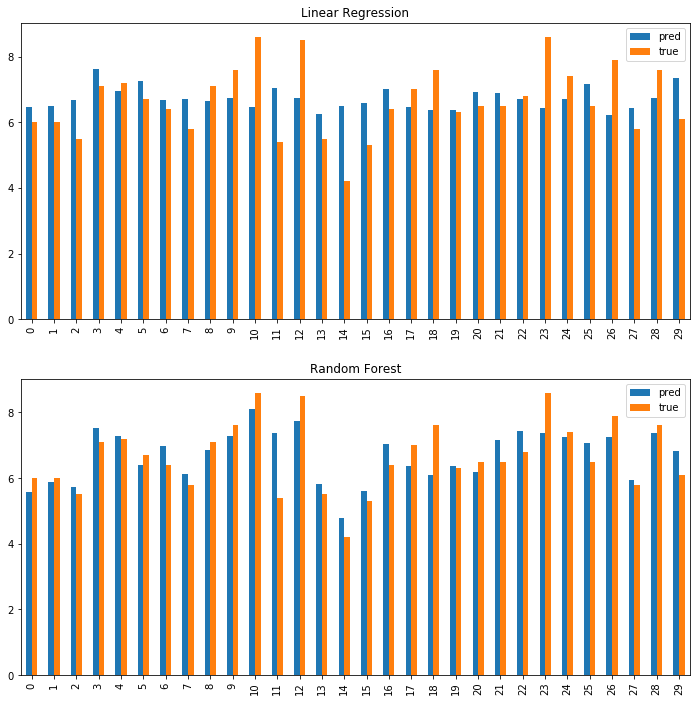

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=1)
linear_pred_df[["pred","true"]].plot(ax=axes[0],kind='bar', title="Linear Regression",figsize=(12,12))
randomforest_df[["pred", "true"]].plot(ax=axes[1], kind='bar', title='Random Forest');

Nhận xét: Với Random Forest mô hình cho kết quả tốt nhất.

##Working with test set

In [0]:
path = "../testdata"
file_list = os.listdir("../testdata")
data_tmp = []
for file in file_list:
    df = pd.read_csv(os.path.join(path,file))
    data_tmp.append(df)
test_X_df = pd.concat(data_tmp, axis = 0, ignore_index=True)


In [37]:
test_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross
0,Mank,0,Follows screenwriter Herman J. Mankiewicz'...,2020,"Biography, Drama","Gary Oldman, Lily Collins, Tuppence Middleton,...",David Fincher,0,NaN
1,Blonde,0,A fictionalized chronicle of the inner lif...,2020,"Biography, Drama","Ana de Armas, Julianne Nicholson, Bobby Cannav...",Andrew Dominik,0,NaN
2,Mob Girl,0,A mother living in New York's lower East S...,2020,"Biography, Crime, Drama","Jennifer Lawrence, Lucas Royalty",Paolo Sorrentino,0,NaN
3,Bernstein,0,A portrait of Leonard Bernstein's singular...,2020,"Biography, Drama, Music","Bradley Cooper, Carey Mulligan",Bradley Cooper,0,NaN
4,Good Joe Bell,0,From the Academy-Award winning writing tea...,2020,"Biography, Drama","Maxwell Jenkins, Mark Wahlberg, Connie Britton...",Reinaldo Marcus Green,0,NaN


In [38]:
test_pred =full_pipeline.predict(fill_na(test_X_df))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Visualize result of test set

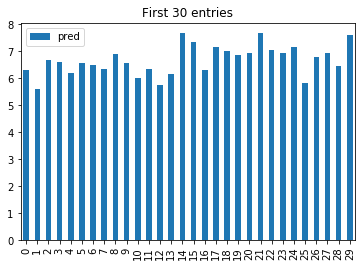

In [39]:
test_pred_df = pd.DataFrame(test_pred[:30], columns=["pred"])
test_pred_df.plot(kind = 'bar', title ='First 30 entries')